In [15]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

raw_data = load_breast_cancer()

In [16]:
X, y = raw_data.data, raw_data.target
np.isnan(X).sum()

np.int64(0)

In [17]:
X.shape, y.shape

((569, 30), (569,))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

scaled_X_train_val = scaler.fit_transform(X_train_val)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

scaled_X_train = scaler.fit_transform(X_train)

In [20]:
from keras import Sequential, layers

model = Sequential(
                [
                    layers.InputLayer(input_shape=(X_train.shape[1],), name='input_layer'),
                    layers.Dense(30, name='layer1', activation='relu'),
                    layers.Dense(30, name='layer2', activation='relu'),
                    layers.Dense(1, name='output_layer', activation='sigmoid')
                ],
                name='classifier_model',
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\KODA\ITHS\9_DeepLearning\DeepLearning\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "classifier_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,891 (7.39 KB)

 Trainable params: 1,891 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(scaled_X_train_val, y_train_val, epochs=1000, validation_data=(scaled_X_val, y_val), verbose=0)

<Axes: xlabel='epochs', ylabel='loss/accuracy'>

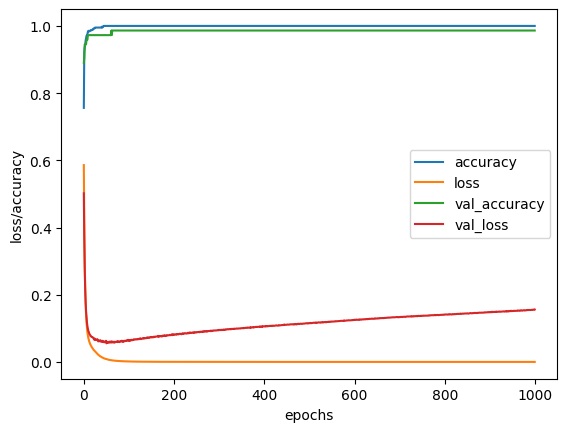

In [22]:
pd.DataFrame(model.history.history).plot(xlabel='epochs', ylabel='loss/accuracy')

In [24]:
from keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor='val_loss', mode="min", patience=15)

In [25]:
model = Sequential(
                [
                    layers.InputLayer(input_shape=(X_train.shape[1],), name='input_layer'),
                    layers.Dense(30, name='layer1', activation='relu'),
                    layers.Dense(30, name='layer2', activation='relu'),
                    layers.Dense(1, name='output_layer', activation='sigmoid')
                ],
                name='classifier_model',
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\KODA\ITHS\9_DeepLearning\DeepLearning\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [26]:
model.fit(scaled_X_train_val, y_train_val, epochs=1000, validation_data=(scaled_X_val, y_val), verbose=1, callbacks=[early_stopper])

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6084 - loss: 0.6961 - val_accuracy: 0.8082 - val_loss: 0.4516
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8579 - loss: 0.4068 - val_accuracy: 0.9178 - val_loss: 0.3239
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9184 - loss: 0.2893 - val_accuracy: 0.9315 - val_loss: 0.2539
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9480 - loss: 0.2244 - val_accuracy: 0.9315 - val_loss: 0.2125
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9484 - loss: 0.1699 - val_accuracy: 0.9315 - val_loss: 0.1846
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9422 - loss: 0.1586 - val_accuracy: 0.9315 - val_loss: 0.1607
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9541 - loss: 0.1427 - val_accuracy: 0.9315 - val_loss: 0.1410
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9705 - loss: 0.1112 - val_accuracy:

<Axes: xlabel='epochs', ylabel='loss/accuracy'>

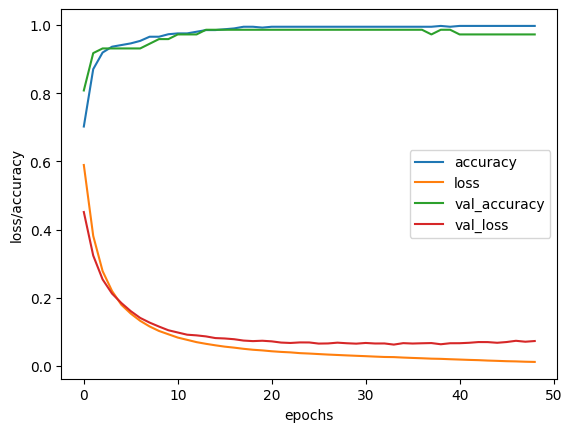

In [27]:
pd.DataFrame(model.history.history).plot(xlabel='epochs', ylabel='loss/accuracy')

Det är en "overfit" då "val_loss" är högre. men det är ok...

In [44]:
df_loss = pd.DataFrame(model.history.history)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = Sequential(
                [
                    layers.InputLayer(input_shape=(X_train.shape[1],), name='input_layer'),
                    layers.Dense(30, name='layer1', activation='relu'),
                    layers.Dense(30, name='layer2', activation='relu'),
                    layers.Dense(1, name='output_layer', activation='sigmoid')
                ],
                name='classifier_model',
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\KODA\ITHS\9_DeepLearning\DeepLearning\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [31]:
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((483,), (86,), (483, 30), (86, 30))

In [43]:
final_loss = pd.DataFrame(model.history.history)

In [46]:
model.fit(scaled_X_train, y_train, epochs=49, validation_data=(scaled_X_test, y_test), verbose=1) # Vi sätter 49 då det va early stopping värdet sedan tidigare, lyckades inte få det att funka med len()

Epoch 1/49
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9968 - loss: 0.0126 - val_accuracy: 0.9767 - val_loss: 0.1009
Epoch 2/49
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0173 - val_accuracy: 0.9767 - val_loss: 0.1039
Epoch 3/49
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9940 - loss: 0.0135 - val_accuracy: 0.9767 - val_loss: 0.1051
Epoch 4/49
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9975 - loss: 0.0135 - val_accuracy: 0.9767 - val_loss: 0.1050
Epoch 5/49
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.0116 - val_accuracy: 0.9767 - val_loss: 0.1061
Epoch 6/49
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0168 - val_accuracy: 0.9767 - val_loss: 0.1078
Epoch 7/49
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0117 - val_accuracy: 0.9767 - val_loss: 0.1084
Epoch 8/49
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9975 - loss: 0.0110 - val_accuracy: 0.9767 - val_loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.96      1.00      0.98        54

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



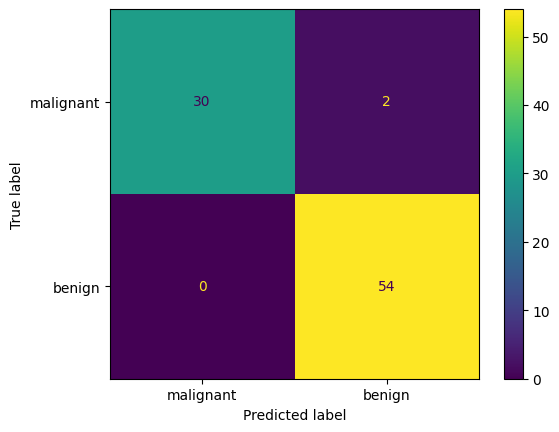

In [47]:
final_loss = pd.DataFrame(model.history.history)

y_pred = model.predict(scaled_X_test)

y_pred = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['malignant', 'benign']).plot()
print(classification_report(y_test, y_pred))